## Unsupervised Learning Algorithms

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Dendrograms (Reduced Data Set)

### 1. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [5]:
# Define path
path = r'C:\Users\16307\Desktop\CareerFoundry\Tasks - Machine Learning\ClimateWins Analysis\Data Sets'

In [6]:
# Read in the reduced data
reduced = pd.read_csv(os.path.join(path, '2000_PCA.csv'))
reduced

,Unnamed: 0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15
0,0,-12.303670,3.984468,4.650371,1.626903,-0.087554,-1.439353,-1.826198,-1.942304,1.901166,0.850767,2.228672,1.752885,1.487777,-0.507642,0.825326
1,1,-11.275915,4.828021,4.950137,0.249943,-1.038258,-0.249952,-0.857263,-0.264164,1.678914,0.594859,1.329267,1.429538,0.955675,-1.355736,0.443111
2,2,-10.795703,3.593919,4.657376,-2.800168,0.461898,0.555462,0.453382,0.976426,-0.300677,0.428805,1.823617,0.519961,1.494393,0.786293,0.095312
3,3,-9.744379,2.305812,3.686662,-2.348202,2.362939,-1.425954,1.029055,2.934832,0.312609,-4.451172,2.081709,0.976015,0.308694,1.114285,0.402117
4,4,-10.362477,3.885228,0.191965,-2.644560,-3.067238,-0.270308,0.628176,-0.284416,-0.077673,-1.534767,0.492276,0.297664,0.818941,-1.642109,0.501668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,-11.870624,-8.194647,-5.335100,2.347469,-0.841473,-3.807072,-3.878817,1.418181,1.924888,0.257522,-1.384876,0.384699,-0.611195,-1.498553,-0.530841
362,362,-12.631110,-7.532162,-6.400491,2.044389,-1.351738,-0.835748,-4.023749,1.193028,1.291244,-2.150128,-5.133528,1.200224,6.024627,-1.739505,1.456915
363,363,-13.192649,-6.635848,-6.397488,3.033823,-0.821675,-0.091561,-2.248851,1.522177,-1.009005,-1.797330,-2.274548,2.116254,4.811218,-0.547781,0.597738
364,364,-13.195805,-3.368171,-3.938788,3.934247,1.822820,-0.547590,-4.354749,0.031681,2.953673,-3.242879,-1.717557,3.129289,1.599187,-1.607377,2.866124


In [7]:
# Drop unnecessary "Unnamed" column
reduced = reduced.drop('Unnamed: 0', axis=1) 
reduced

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15
0,-12.303670,3.984468,4.650371,1.626903,-0.087554,-1.439353,-1.826198,-1.942304,1.901166,0.850767,2.228672,1.752885,1.487777,-0.507642,0.825326
1,-11.275915,4.828021,4.950137,0.249943,-1.038258,-0.249952,-0.857263,-0.264164,1.678914,0.594859,1.329267,1.429538,0.955675,-1.355736,0.443111
2,-10.795703,3.593919,4.657376,-2.800168,0.461898,0.555462,0.453382,0.976426,-0.300677,0.428805,1.823617,0.519961,1.494393,0.786293,0.095312
3,-9.744379,2.305812,3.686662,-2.348202,2.362939,-1.425954,1.029055,2.934832,0.312609,-4.451172,2.081709,0.976015,0.308694,1.114285,0.402117
4,-10.362477,3.885228,0.191965,-2.644560,-3.067238,-0.270308,0.628176,-0.284416,-0.077673,-1.534767,0.492276,0.297664,0.818941,-1.642109,0.501668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-11.870624,-8.194647,-5.335100,2.347469,-0.841473,-3.807072,-3.878817,1.418181,1.924888,0.257522,-1.384876,0.384699,-0.611195,-1.498553,-0.530841
362,-12.631110,-7.532162,-6.400491,2.044389,-1.351738,-0.835748,-4.023749,1.193028,1.291244,-2.150128,-5.133528,1.200224,6.024627,-1.739505,1.456915
363,-13.192649,-6.635848,-6.397488,3.033823,-0.821675,-0.091561,-2.248851,1.522177,-1.009005,-1.797330,-2.274548,2.116254,4.811218,-0.547781,0.597738
364,-13.195805,-3.368171,-3.938788,3.934247,1.822820,-0.547590,-4.354749,0.031681,2.953673,-3.242879,-1.717557,3.129289,1.599187,-1.607377,2.866124


In [8]:
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

### 3. Dendrograms (Reduced Data Set)

#### Single Method

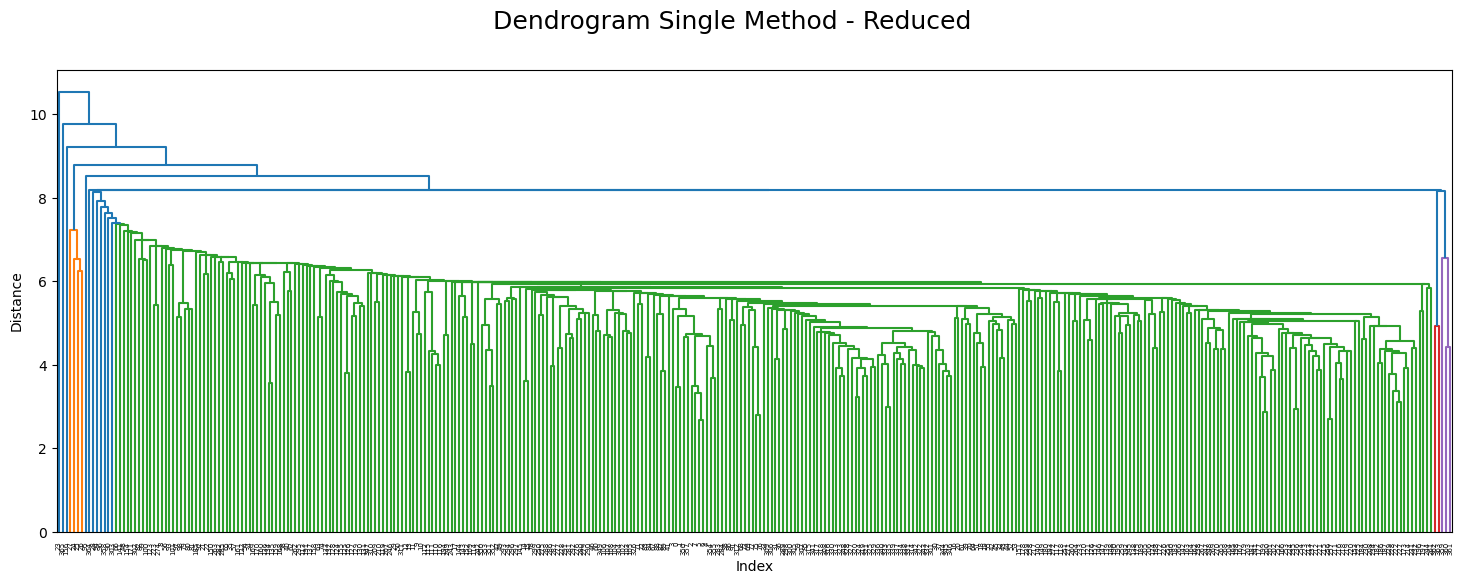

In [11]:
# Perform hierarchical clustering using the "single" linkage method

distance_single = linkage(
    reduced.loc[:, [f'PCA{i}' for i in range(1, 16)]],  # Select PCA1 to PCA15
    method="single"
)

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method - Reduced", fontsize=18)
plt.show()

#### Complete Method

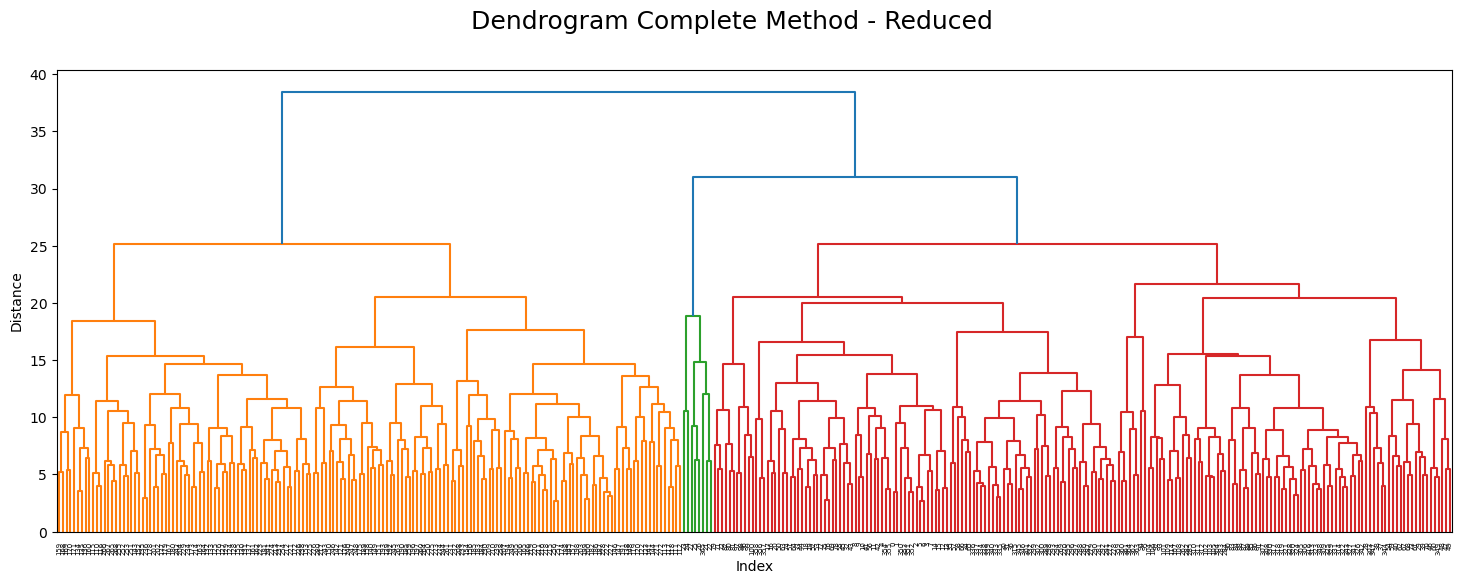

In [13]:
# Perform hierarchical clustering using the "complete" linkage method

distance_complete = linkage(
    reduced.loc[:, [f'PCA{i}' for i in range(1, 16)]],  # Select PCA1 to PCA15
    method="complete"
)

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method - Reduced", fontsize=18)
plt.show()

#### Average Method

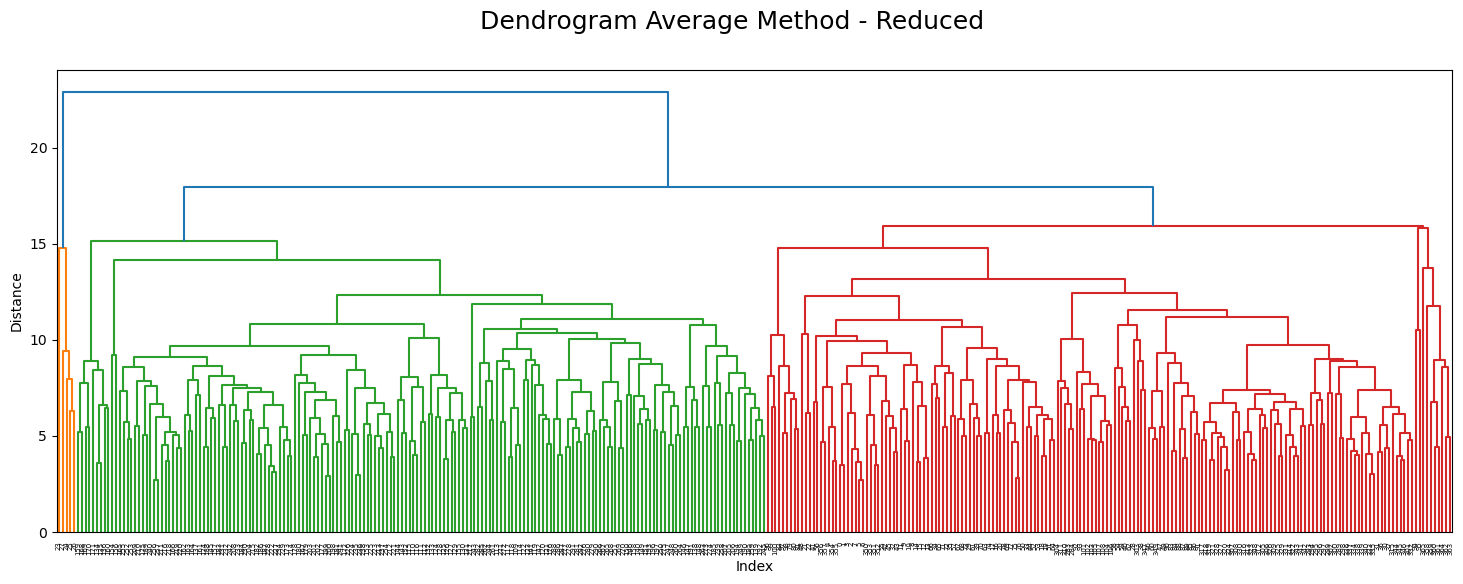

In [15]:
# Perform hierarchical clustering using the "average" linkage method

distance_average = linkage(
    reduced.loc[:, [f'PCA{i}' for i in range(1, 16)]],  # Select PCA1 to PCA15
    method="average"
)

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method - Reduced", fontsize=18)
plt.show()

#### Ward Method

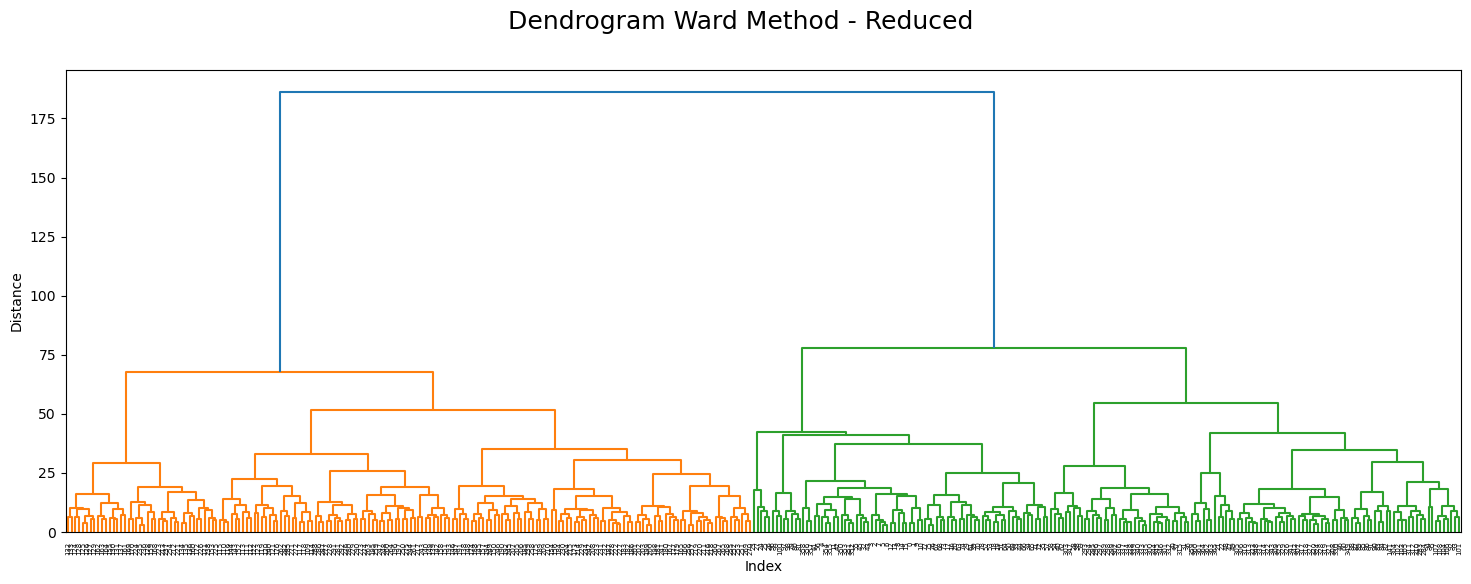

In [17]:
# Perform hierarchical clustering using the "ward" linkage method

distance_ward = linkage(
    reduced.loc[:, [f'PCA{i}' for i in range(1, 16)]],  # Select PCA1 to PCA15
    method="ward"
)

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method - Reduced", fontsize=18)
plt.show()